In [128]:
# Needed imports for the program
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [129]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [130]:
# Reading in the original dataset
data_initial = pd.read_csv('18k_Projects.csv', low_memory=False)

In [131]:
# Printing out the initial columns
data_initial.columns

Index(['Id', 'Name', 'Url', 'State', 'Currency', 'Top Category', 'Category',
       'Creator', 'Location', 'Updates', 'Comments', 'Rewards', 'Goal',
       'Pledged', 'Backers', 'Start', 'End', 'Duration in Days',
       'Facebook Connected', 'Facebook Friends', 'Facebook Shares',
       'Has Video', 'Latitude', 'Longitude', 'Start Timestamp (UTC)',
       'End Timestamp (UTC)', 'Creator Bio', 'Creator Website',
       'Creator - # Projects Created', 'Creator - # Projects Backed',
       '# Videos', '# Images', '# Words (Description)',
       '# Words (Risks and Challenges)', '# FAQs'],
      dtype='object')

In [132]:
# Printing out the initial data
data_initial

,Id,Name,Url,State,...,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,1007121454,Nail Art and Photos Printed on your Nails w/ E...,https://www.kickstarter.com/projects/137019948...,failed,...,2,297,153.0,0
1,2032015036,Cold Again,https://www.kickstarter.com/projects/737783165...,failed,...,0,276,98.0,0
2,733782855,Uchu Bijin Jewelry,https://www.kickstarter.com/projects/uchubijin...,failed,...,12,1049,66.0,2
...,...,...,...,...,...,...,...,...,...
18139,1856281681,The Awkward Yeti's Great Big Project - 3 Books...,https://www.kickstarter.com/projects/106395834...,successful,...,6,962,238.0,1
18140,1845568888,King James Version,https://www.kickstarter.com/projects/193669267...,failed,...,1,654,131.0,0
18141,1693087893,BBC Gardeners' World Live - RHS Show Garden co...,https://www.kickstarter.com/projects/jasonloh/...,failed,...,6,372,156.0,0


In [133]:
# Removing all of the extra columns
data_initial.drop(labels=['Id', 'Name', 'Url', 'Category', 'Creator', 'Location'], axis=1, inplace=True)
data_initial.drop(labels=['Updates', 'Start', 'End',  '# FAQs', 'Start Timestamp (UTC)'], axis=1, inplace=True)
data_initial.drop(labels=['End Timestamp (UTC)', 'Latitude', 'Longitude'], axis=1, inplace=True)
data_initial.drop(labels=['Comments', 'Rewards', 'Pledged', 'Backers' ], axis=1, inplace=True)
data_initial.drop(labels=['Creator Bio', 'Creator Website', 'Creator - # Projects Backed'], axis=1, inplace=True)
data_initial.drop(labels=['# Videos', 'Facebook Connected', 'Facebook Shares', 'Has Video'],  axis=1, inplace=True)
data_initial.drop(labels=['# Words (Risks and Challenges)', 'Top Category'], axis=1, inplace=True)

In [134]:
# Printing out the remaining columns
data_initial.columns

Index(['State', 'Currency', 'Goal', 'Duration in Days', 'Facebook Friends',
       'Creator - # Projects Created', '# Images', '# Words (Description)'],
      dtype='object')

In [135]:
# Replacing successful and failed with 1 and 0, respectively
data_initial.loc[data_initial['State'] == 'successful', 'State'] = 1 
data_initial.loc[data_initial['State'] == 'failed', 'State'] = 0

In [136]:
# Making sure they all have the same currency in USD and then removing column
data_initial = data_initial[data_initial['Currency'] == 'USD']

In [137]:
# Removing all of the null data
data = data_initial.dropna()

In [138]:
# Renaming the columns
data.columns = ['State', 'Currency', 'Goal', 'Duration', 'Friends', 'Projects', 'Images', 'Words']

In [142]:
# Printing out the final data
data

,State,Currency,Goal,Duration,Friends,Projects,Images,Words
0,0,USD,20000,30,272.0,1,2,297
1,0,USD,3000,33,573.0,1,0,276
3,0,USD,5000,60,1285.0,1,0,309
...,...,...,...,...,...,...,...,...
18138,1,USD,7000,30,2346.0,2,0,123
18139,1,USD,18000,30,316.0,4,6,962
18140,0,USD,100000,30,1103.0,2,1,654


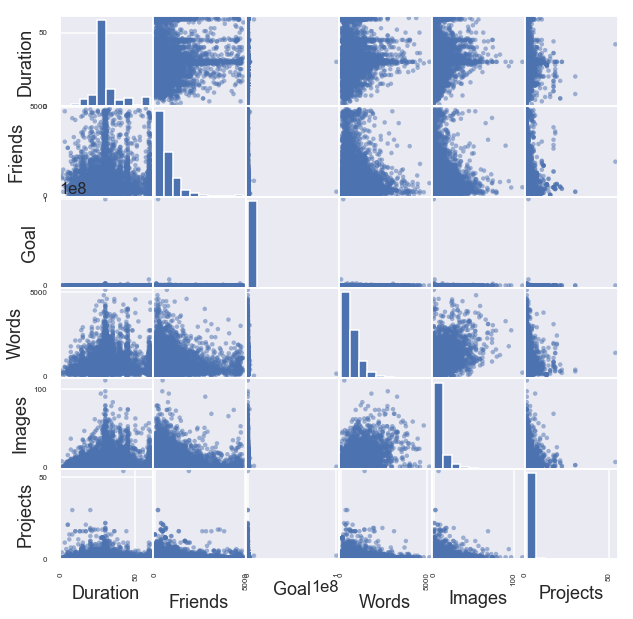

In [143]:
# Plotting out the correlation matrix of the variables we are comparing
f1 = pd.plotting.scatter_matrix(data[['Duration', 'Friends', 'Goal', 'Words', 'Images', 'Projects']], figsize=[10,10])

Text(0.5,1,'Number of projects that failed and succeeded')

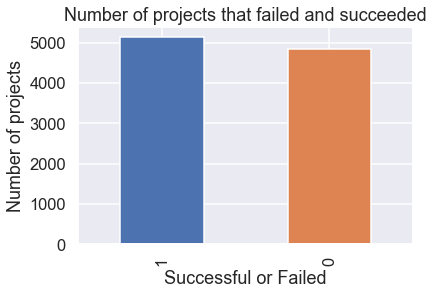

In [146]:
# Plotting total number of successes and failures in dataset
data['State'].value_counts().plot('bar')
plt.xlabel("Successful or Failed")
plt.ylabel("Number of projects")
plt.title("Number of projects that failed and succeeded")